In [2]:
pip install geopandas

     |████████████████████████████████| 972kB 2.8MB/s 
     |████████████████████████████████| 14.8MB 327kB/s 
     |████████████████████████████████| 6.5MB 34.1MB/s 


In [13]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes

In [9]:
import requests
import tempfile
import zipfile

temporary_location = tempfile.gettempdir()
def download_unzip(url, dirname = tempfile.gettempdir(), destname = "borders"):
  myfile = requests.get(url)
  open(dirname + '/' + destname + '.zip', 'wb').write(myfile.content)
  with zipfile.ZipFile(dirname + '/' + destname + '.zip', 'r') as zip_ref:
      zip_ref.extractall(dirname + '/' + destname)

download_unzip('https://www.data.gouv.fr/fr/datasets/r/07b7c9a2-d1e2-4da6-9f20-01a7b72d4b12')
communes_borders = gpd.read_file(temporary_location + "/borders/communes-20190101.json")
communes_borders.head()

,insee,nom,wikipedia,surf_ha,geometry
0,97223,Saint-Esprit,fr:Saint-Esprit (Martinique),2318,"POLYGON ((-60.93595 14.58812, -60.93218 14.585..."
1,97233,Le Morne-Vert,fr:Le Morne-Vert,1325,"POLYGON ((-61.12165 14.71928, -61.11852 14.716..."
2,97208,Fonds-Saint-Denis,fr:Fonds-Saint-Denis,2374,"POLYGON ((-61.13355 14.74657, -61.13066 14.748..."
3,97224,Saint-Joseph,fr:Saint-Joseph (Martinique),4324,"POLYGON ((-61.08459 14.72510, -61.08430 14.722..."
4,97212,Gros-Morne,fr:Gros-Morne,4601,"POLYGON ((-61.08459 14.72510, -61.08061 14.725..."


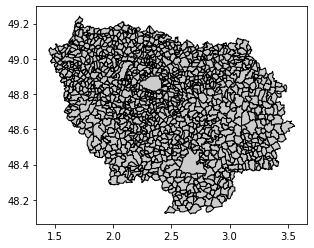

In [8]:
data_borders = communes_borders.set_index('insee')
data_borders['dep'] = data_borders.index.str[:2]
communes = data_borders.loc[data_borders['dep'].isin(['75','77','78','91','92','93','94','95'])].plot(color='0.8', edgecolor='black')
communes


# Points de contact Véligo 

Données disponibles au lien suivant : https://smartregionidf.opendatasoft.com/explore/dataset/points-de-contact-veligo-location/information/

---



In [10]:
veligo = gpd.read_file('https://smartregionidf.opendatasoft.com/explore/dataset/points-de-contact-veligo-location/download/?format=geojson&timezone=Europe/Berlin&lang=fr')

In [11]:
veligo.head()

,mardi,reparation,y_wgs84,location,ville,code_post,vendredi,adresse,aide,jeudi,lundi,nom,dimanche,samedi,training,infos,x_wgs84,id,mercredi,geometry
0,8h00 - 17h00,non,48.802526,oui,SAINT MAUR DES FOSSÉS,94100,8h00 - 17h00,46 avenue Foch,non,8h00 - 17h00,8h00 - 17h00,ST MAUR DES FOSSES PDC,Fermé,8h00 - 12h00,non,oui,2.491293,3000,8h00 - 17h00,POINT (2.49129 48.80253)
1,8h00 - 18h00,non,48.829547,oui,BRY SUR MARNE,94360,8h00 - 18h00,6 rue du Clos Sainte Catherine,non,8h00 - 18h00,8h00 - 18h00,BRY PPDC1,Fermé,8h00 - 12h00,non,oui,2.524548,3002,8h00 - 18h00,POINT (2.52455 48.82955)
2,7h00 - 18h00,non,48.777900,oui,CRETEIL,94000,7h00 - 18h00,50 avenue de la France libre,non,7h00 - 18h00,7h00 - 18h00,CRETEIL PPDC1,Fermé,7h00 - 12h00,non,oui,2.454900,3003,7h00 - 18h00,POINT (2.45490 48.77790)
3,8h00 - 17h00,non,48.849355,oui,FONTENAY SOUS BOIS,94120,8h00 - 17h00,30 rue Guérin Leroux,non,8h00 - 17h00,8h00 - 17h00,FONTENAY SOUS BOIS PDC1,Fermé,8h00 - 11h00,non,oui,2.475313,3004,8h00 - 17h00,POINT (2.47531 48.84936)
4,8h00 - 17h30,non,48.806700,oui,IVRY SUR SEINE,94200,8h00 - 17h30,47 bis rue Ernest Renan,non,8h00 - 17h30,8h00 - 17h30,IVRY PDC1,Fermé,8h00 - 12h00,non,oui,2.401500,3005,8h00 - 17h30,POINT (2.40150 48.80670)


NB : cette BDD contient des informations sur les horaires et jours de disponibilités des Véligo -> à prendre en compte pour les trajets

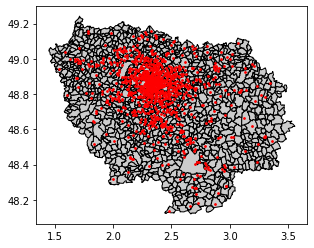

In [27]:
fig, ax = plt.subplots()
data_borders.loc[data_borders['dep'].isin(['75','77','78','91','92','93','94','95'])].plot(ax=ax, color='0.8', edgecolor='black')
veligo.plot(ax=ax, color='red', markersize=3)
plt.show()

# Cristolib et Vélo2 en libre-service à Créteil

Données disponibles aux liens suivants : 
- https://smartregionidf.opendatasoft.com/explore/dataset/cristolib_-_velos_en_libre-service_a_creteil/information/
- https://smartregionidf.opendatasoft.com/explore/dataset/jcdecaux-bike-stations-data/information/


In [28]:
velos = gpd.read_file('https://smartregionidf.opendatasoft.com/explore/dataset/jcdecaux-bike-stations-data/download/?format=geojson&timezone=Europe/Berlin&lang=fr')
cristolib = gpd.read_file('https://smartregionidf.opendatasoft.com/explore/dataset/cristolib_-_velos_en_libre-service_a_creteil/download/?format=geojson&timezone=Europe/Berlin&lang=fr')

In [38]:
cristolib.head()

,name,number,longitude,address,latitude,geometry
0,09 - EUROPARC,9,2.471315,ALLEE FERNAND POUILLON,48.766038,POINT (2.47131 48.76604)
1,08 - ROND POINT HOTEL DE VILLE,8,2.455378,Avenue de la France Libre,48.777352,POINT (2.45538 48.77735)
2,04 - UNIVERSITE - MAIL DES MECHES,4,2.446249,Avenue du Général de Gaulle,48.788111,POINT (2.44625 48.78811)
3,02 - HOPITAL INTERCOMMUNAL (CHIC),2,2.463706,AVENUE DE VERDUN,48.796174,POINT (2.46371 48.79617)
4,01 - LATTRE DE TASSIGNY,1,2.453876,AVENUE DU MARECHAL DE LATTRE DE TASSIGNY,48.798835,POINT (2.45388 48.79884)


In [65]:
velos.loc[velos['contract_name'].isin(['creteil'])].head()

,status,contract_name,name,bonus,bike_stands,number,last_update,available_bike_stands,banking,available_bikes,address,geometry
0,OPEN,creteil,01 - LATTRE DE TASSIGNY,False,26,1,2020-11-07T18:15:18+01:00,15,True,8,AVENUE DU MARECHAL DE LATTRE DE TASSIGNY,POINT (2.45388 48.79884)
1,OPEN,creteil,06 - AVENUE DE LA BRECHE,False,24,6,2020-11-07T18:21:33+01:00,14,True,9,AVENUE DE LA BRECHE,POINT (2.45458 48.78350)
7,OPEN,creteil,10 - MAGELLAN,False,20,10,2020-11-07T18:20:40+01:00,9,True,11,RUE MAGELLAN,POINT (2.45666 48.76896)
14,OPEN,creteil,09 - EUROPARC,False,22,9,2020-11-07T18:16:43+01:00,11,True,6,ALLEE FERNAND POUILLON,POINT (2.47131 48.76604)
15,OPEN,creteil,04 - UNIVERSITE - MAIL DES MECHES,False,40,4,2020-11-07T18:17:38+01:00,29,True,11,Avenue du Général de Gaulle,POINT (2.44625 48.78811)


La colonne "available_bikes" est mise à jour en temps réel !

In [39]:
cristolib.count

<bound method DataFrame.count of                                           name  ...                  geometry
0                                09 - EUROPARC  ...  POINT (2.47131 48.76604)
1               08 - ROND POINT HOTEL DE VILLE  ...  POINT (2.45538 48.77735)
2            04 - UNIVERSITE - MAIL DES MECHES  ...  POINT (2.44625 48.78811)
3            02 - HOPITAL INTERCOMMUNAL (CHIC)  ...  POINT (2.46371 48.79617)
4                      01 - LATTRE DE TASSIGNY  ...  POINT (2.45388 48.79884)
5                     06 - AVENUE DE LA BRECHE  ...  POINT (2.45458 48.78350)
6  03 - RUE DU GENERAL LECLERC - CENTRE ANCIEN  ...  POINT (2.46489 48.79079)
7               05 - GENERAL LECLERC / BARRAGE  ...  POINT (2.46857 48.78684)
8           07- AVENUE DU DOCTEUR PAUL CASALIS  ...  POINT (2.46969 48.78021)
9                                10 - MAGELLAN  ...  POINT (2.45666 48.76896)

[10 rows x 6 columns]>

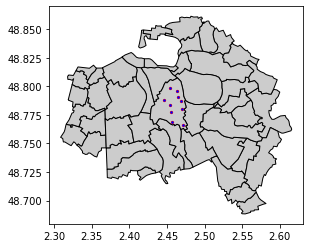

In [56]:
fig, ax = plt.subplots()
data_borders.loc[data_borders['dep'].isin(['94'])].plot(ax=ax, color='0.8', edgecolor='black')
cristolib.plot(ax=ax, color='red', markersize=5)
velos.loc[velos['contract_name'].isin(['creteil'])].plot(ax=ax, color='blue', markersize=2)
plt.show()

Les points des 2 BDD se superposent donc les 2 BDD continennent les mêmes stations pour Crétéil.
De plus, BDD très légère car seulement 9 points + ne concerne que Créteil




---

# VélO2 et Cristolib et Vélo2 en libre-service dans le 95

Données disponibles aux liens suivants : 
- https://smartregionidf.opendatasoft.com/explore/dataset/jcdecaux-bike-stations-data/information/
- https://smartregionidf.opendatasoft.com/explore/dataset/velo2_-_cergy-pontoise_et_communes_limitrophes/information/

In [62]:
velos = gpd.read_file('https://smartregionidf.opendatasoft.com/explore/dataset/jcdecaux-bike-stations-data/download/?format=geojson&timezone=Europe/Berlin&lang=fr')
velos2 = gpd.read_file('https://smartregionidf.opendatasoft.com/explore/dataset/velo2_-_cergy-pontoise_et_communes_limitrophes/download/?format=geojson&timezone=Europe/Berlin&lang=fr')

In [64]:
velos.loc[velos['contract_name'].isin(['cergy-pontoise'])].head()

,status,contract_name,name,bonus,bike_stands,number,last_update,available_bike_stands,banking,available_bikes,address,geometry
2,OPEN,cergy-pontoise,53001 - PON01 - RUE SERE-DEPOIN (CB),False,20,53001,2020-11-07T18:19:53+01:00,16,True,4,Place du Général de Gaulle devant la Gare - 95...,POINT (2.09682 49.04762)
3,OPEN,cergy-pontoise,53101 - SOA01 - PLACE CARNOT (CB),False,19,53101,2020-11-07T18:21:08+01:00,13,True,6,Place Carnot côté quai de l'Ecluse ou halage -...,POINT (2.10304 49.04778)
4,OPEN,cergy-pontoise,50016 - CER16 - UNIVERSITÉ LES CHÊNES (CB),False,30,50016,2020-11-07T18:21:47+01:00,23,True,7,RUE DES CHÊNES D'OR ANGLE BOULEVARD DU PORT - ...,POINT (2.07640 49.03887)
5,OPEN,cergy-pontoise,53003 - PON03 - UNIVERSITÉ ST MARTIN,False,20,53003,2020-11-07T18:21:16+01:00,13,False,7,Avenue François Mitterand côté boulevard du Po...,POINT (2.08481 49.04358)
6,OPEN,cergy-pontoise,50007 - CER07 - PARC ST-CHRISTOPHE,False,14,50007,2020-11-07T18:21:39+01:00,10,False,4,AVENUE DE L'ENTREPRISE ANGLE ROND POINT DU CÈD...,POINT (2.02969 49.04300)


In [58]:
velos2.head()

,ville,name,number,longitude,dept,address,latitude,cp,geometry
0,CERGY,50009 - CER09 - RUE DU BRÛLOIR,50009,2.071980564465145,95,88 RUE DU BRÛLOIR ANGLE RUE DES TOULEUSES POUR...,49.0286831553259,95000,POINT (2.07198 49.02868)
1,PONTOISE,53002 - PON02 - PLACE DE LA LIBÉRATION,53002,2.090817351366363,95,Place de la Libération côté avenue de Verdun -...,49.04468282112117,95300,POINT (2.09082 49.04468)
2,CERGY,50022 - CER22 - GARE CERGY GRAND CENTRE (CB),50022,2.081226367153945,95,BOULEVARD DE L'OISE / RUE DE LA GARE - 95000 C...,49.035362060119965,95000,POINT (2.08123 49.03536)
3,CERGY,50012 - CER12 - PLACE DU HAUT-GENCY,50012,2.044759833610792,95,PLACE DU HAUT DE GENCY ANGLE RUE DES VENDANGES...,49.047822987655735,95000,POINT (2.04476 49.04782)
4,CERGY,50003 - CER03 - LES ESSARTS (CB),50003,2.019491026664161,95,AVENUE DES ESSARTS ANGLE BOULEVARD DE L'OISE -...,49.04205234323104,95000,POINT (2.01949 49.04205)


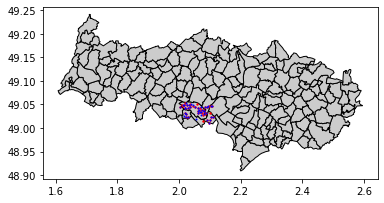

In [55]:
fig, ax = plt.subplots()
data_borders.loc[data_borders['dep'].isin(['95'])].plot(ax=ax, color='0.8', edgecolor='black')
velos.loc[velos['contract_name'].isin(['cergy-pontoise'])].plot(ax=ax, color='red', markersize=2)
velos2.plot(ax=ax, color='blue', markersize=1)
plt.show()

In [59]:
velos.loc[velos['contract_name'].isin(['cergy-pontoise'])].shape

(43, 12)

In [60]:
velos2.shape

(42, 9)

NB : penser à croiser les 2 BDD pour voir s'il y a des redondances entre les 43 points de la première et les 42 points de la deuxième

# Vélib - disponibilité en temps réel

Données disponibles au lien suivant : 
https://smartregionidf.opendatasoft.com/explore/dataset/velib-disponibilite-en-temps-reel/export/?disjunctive.name&disjunctive.is_installed&disjunctive.is_renting&disjunctive.is_returning&disjunctive.nom_arrondissement_communes

In [67]:
velib = gpd.read_file("https://smartregionidf.opendatasoft.com/explore/dataset/velib-disponibilite-en-temps-reel/download/?format=geojson&timezone=Europe/Berlin&lang=fr")

In [74]:
velib.head()

,ebike,numbikesavailable,is_installed,is_renting,mechanical,stationcode,numdocksavailable,duedate,is_returning,geometry
0,1,1,OUI,OUI,0,16107,34,2020-11-07T17:59:09+01:00,OUI,None
1,6,13,OUI,OUI,7,11104,7,2020-11-07T17:59:46+01:00,OUI,None
2,3,17,OUI,OUI,14,6015,38,2020-11-07T17:57:08+01:00,OUI,None
3,5,10,OUI,OUI,5,9020,10,2020-11-07T17:58:49+01:00,OUI,None
4,13,25,OUI,OUI,12,5001,21,2020-11-07T17:59:42+01:00,OUI,None


Problème avec la colonne "geometry" : pas de données géographiques 


In [77]:
velib = gpd.read_file("https://www.data.gouv.fr/fr/datasets/r/8e31baaa-e5bd-4927-b4f1-8c61f6bcfd4d")

In [78]:
velib.head()

,ebike,numbikesavailable,is_installed,is_renting,mechanical,stationcode,numdocksavailable,duedate,is_returning,geometry
0,1,1,OUI,OUI,0,16107,34,2020-11-07T17:59:09+01:00,OUI,None
1,2,9,OUI,OUI,7,11104,11,2020-11-07T17:59:46+01:00,OUI,None
2,5,20,OUI,OUI,15,6015,35,2020-11-07T18:00:28+01:00,OUI,None
3,4,9,OUI,OUI,5,9020,11,2020-11-07T17:58:49+01:00,OUI,None
4,12,29,OUI,OUI,17,12109,1,2020-11-07T17:59:44+01:00,OUI,None


Pareil avec les données de : https://www.data.gouv.fr/fr/datasets/r/8e31baaa-e5bd-4927-b4f1-8c61f6bcfd4d

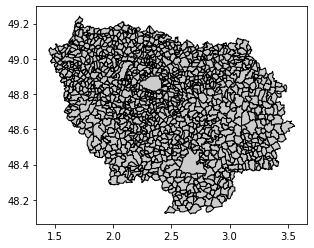

In [79]:
fig, ax = plt.subplots()
data_borders.loc[data_borders['dep'].isin(['75','77','78','91','92','93','94','95'])].plot(ax=ax, color='0.8', edgecolor='black')
#velib.plot(ax=ax, color='red', markersize=2)
plt.show()